# MyAnimeList Database 2020
This dataset contains information about 17562 anime and the preference from 325772 different users. 

In particular, this dataset contain:

* The anime list per user. Include dropped, complete, plan to watch, currently watching and on hold.
* Ratings given by users to the animes that they has watched completely.
* Information about the anime like genre, stats, studio, etc.
* These files contain information such as reviews, synopsis, information about the staff, anime statistics, genre, etc.


## animelist.csv have the list of all animes register by the user with the respective score, watching status and numbers of episodes watched. This dataset contains 109 Million row, 17.562 different animes and 325.772 different users. The file have the following columns:
* user_id: non identifiable randomly generated user id.
* anime_id: MyAnemlist ID of the anime. (e.g. 1).
* score: score between 1 to 10 given by the user. 0 if the user didn't assign a score. (e.g. 10)
* watching_status: state ID from this anime in the anime list of this user. (e.g. 2)
* watched_episodes: numbers of episodes watched by the user. (e.g. 24)

## watching_status.csv describe every possible status of the column:
"watching_status" in animelist.csv.

## rating_complete.csv is a subset of animelist.csv. 
This dataset only considers animes that the user has watched completely (watching_status==2) and gave it a score (score!=0). This dataset contains 57 Million ratings applied to 16.872 animes by 310.059 users. This file have the following columns:

* user_id: non identifiable randomly generated user id.
* anime_id: - MyAnimelist ID of the anime that this user has rated.
* rating: rating that this user has assigned.

## anime.csv contain general information of every anime (17.562 different anime) like genre, stats, studio, etc. This file have the following columns:
* MAL_ID: MyAnimelist ID of the anime. (e.g. 1)
* Name: full name of the anime. (e.g. Cowboy Bebop)
* Score: average score of the anime given from all users in MyAnimelist database. (e.g. 8.78)
* Genders: comma separated list of genres for this anime. (e.g. Action, Adventure, Comedy, Drama, Sci-Fi, Space)
* English name: full name in english of the anime. (e.g. Cowboy Bebop)
* Japanese name: full name in japanses of the anime. (e.g. カウボーイビバップ)
* Type: TV, movie, OVA, etc. (e.g. TV)
* Episodes': number of chapters. (e.g. 26)
* Aired: broadcast date. (e.g. Apr 3, 1998 to Apr 24, 1999)
* Premiered: season premiere. (e.g. Spring 1998)
* Producers: comma separated list of produducers (e.g. Bandai Visual)
* Licensors: comma separated list of licensors (e.g. Funimation, Bandai Entertainment)
* Studios: comma separated list of studios (e.g. Sunrise)
* Source: Manga, Light novel, Book, etc. (e.g Original)
* Duration: duration of the anime per episode (e.g 24 min. per ep.)
* Rating: age rate (e.g. R - 17+ (violence & profanity))
* Ranked: position based in the score. (e.g 28)
* Popularity: position based in the the number of users who have added the anime to their list. (e.g 39)
* Members: number of community members that are in this anime's "group". (e.g. 1251960)
* Favorites: number of users who have the anime as "favorites". (e.g. 61,971)
* Watching: number of users who are watching the anime. (e.g. 105808)
* Completed: number of users who have complete the anime. (e.g. 718161)
* On-Hold: number of users who have the anime on Hold. (e.g. 71513)
* Dropped: number of users who have dropped the anime. (e.g. 26678)
* Plan to Watch': number of users who plan to watch the anime. (e.g. 329800)
* Score-10': number of users who scored 10. (e.g. 229170)
* Score-9': number of users who scored 9. (e.g. 182126)
* Score-8': number of users who scored 8. (e.g. 131625)
* Score-7': number of users who scored 7. (e.g. 62330)
* Score-6': number of users who scored 6. (e.g. 20688)
* Score-5': number of users who scored 5. (e.g. 8904)
* Score-4': number of users who scored 4. (e.g. 3184)
* Score-3': number of users who scored 3. (e.g. 1357)
* Score-2': number of users who scored 2. (e.g. 741)
* Score-1': number of users who scored 1. (e.g. 1580)

Importing packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from collections import defaultdict

In [5]:
anime = pd.read_csv("anime.csv")
anime_with_synopsis = pd.read_csv("anime_with_synopsis.csv")
#rating_complete = pd.read_csv("rating_complete.csv")
watching_status = pd.read_csv("watching_status.csv")
#animelist = pd.read_csv("animelist.csv")

In [4]:
anime

,MAL_ID,Name,Score,Genders,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,Unknown,Unknown,Unknown,Novel,Unknown,Unknown,Unknown,13116,354,6,0,0,0,0,354,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,Kadokawa,Unknown,Passione,Manga,Unknown,Unknown,Unknown,17562,7010,70,14,0,14,0,6982,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,Unknown,Unknown,Unknown,Visual novel,Unknown,R - 17+ (violence & profanity),Unknown,17558,11309,48,3,0,0,0,11306,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,Kadokawa,Unknown,8bit,Manga,Unknown,PG-13 - Teens 13 or older,Unknown,17565,1386,2,13,2,2,1,1368,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [6]:
anime.shape

(17562, 35)

In [6]:
anime.dtypes

MAL_ID            int64
Name             object
Score            object
Genders          object
English name     object
Japanese name    object
Type             object
Episodes         object
Aired            object
Premiered        object
Producers        object
Licensors        object
Studios          object
Source           object
Duration         object
Rating           object
Ranked           object
Popularity        int64
Members           int64
Favorites         int64
Watching          int64
Completed         int64
On-Hold           int64
Dropped           int64
Plan to Watch     int64
Score-10         object
Score-9          object
Score-8          object
Score-7          object
Score-6          object
Score-5          object
Score-4          object
Score-3          object
Score-2          object
Score-1          object
dtype: object

In [7]:
## Removing unwanted columns
anime = anime.drop(columns=['MAL_ID','Japanese name'])
anime = anime.rename(columns={'Genders':'Genres'})

In [8]:
anime.describe()

,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
count,17562.000000,1.756200e+04,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,17562.000000
mean,8763.452340,3.465854e+04,457.746270,2231.487758,2.209557e+04,955.049653,1176.599533,8199.831227
std,5059.327278,1.252821e+05,4063.473313,14046.688133,9.100919e+04,4275.675096,4740.348653,23777.691963
min,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,4383.500000,3.360000e+02,0.000000,13.000000,1.110000e+02,6.000000,37.000000,112.000000
50%,8762.500000,2.065000e+03,3.000000,73.000000,8.175000e+02,45.000000,77.000000,752.500000
75%,13145.000000,1.322325e+04,31.000000,522.000000,6.478000e+03,291.750000,271.000000,4135.500000
max,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000,425531.000000


In [9]:
anime.isnull().sum()

## There are no null values present

Name             0
Score            0
Genres           0
English name     0
Type             0
Episodes         0
Aired            0
Premiered        0
Producers        0
Licensors        0
Studios          0
Source           0
Duration         0
Rating           0
Ranked           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
Plan to Watch    0
Score-10         0
Score-9          0
Score-8          0
Score-7          0
Score-6          0
Score-5          0
Score-4          0
Score-3          0
Score-2          0
Score-1          0
dtype: int64

In [10]:
anime['Name'].nunique()
## Out of 17562 records, 17558 are unique names so we do not need to remove duplicates

17558

In [11]:
anime['Name'] = anime['Name'].astype(str)
print(anime[anime.Name.str.startswith(r'[^0-9]')])

Empty DataFrame
Columns: [Name, Score, Genres, English name, Type, Episodes, Aired, Premiered, Producers, Licensors, Studios, Source, Duration, Rating, Ranked, Popularity, Members, Favorites, Watching, Completed, On-Hold, Dropped, Plan to Watch, Score-10, Score-9, Score-8, Score-7, Score-6, Score-5, Score-4, Score-3, Score-2, Score-1]
Index: []


In [12]:
anime[anime['Name'].astype(str).str.startswith('#')]

,Name,Score,Genres,English name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
15005,#Compass,Unknown,Game,Unknown,ONA,Unknown,"Aug 22, 2018 to ?",Unknown,Unknown,Unknown,"TMS Entertainment, Echoes",Game,4 min.,G - All Ages,13189.0,13691,284,0,59,0,22,39,164,4.0,1.0,4.0,4.0,5.0,4.0,8.0,3.0,2.0,6.0


In [13]:
# get genres
Genres = defaultdict(int)
for val in anime['Genres']:
  for v in val.split(','):
    Genres[ v.strip() ] += 1

print("anime genres = ", list(dict(Genres).keys()) )

anime genres =  ['Action', 'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Space', 'Mystery', 'Shounen', 'Police', 'Supernatural', 'Magic', 'Fantasy', 'Sports', 'Josei', 'Romance', 'Slice of Life', 'Cars', 'Seinen', 'Horror', 'Psychological', 'Thriller', 'Super Power', 'Martial Arts', 'School', 'Ecchi', 'Vampire', 'Military', 'Historical', 'Dementia', 'Mecha', 'Demons', 'Samurai', 'Game', 'Shoujo', 'Harem', 'Music', 'Shoujo Ai', 'Shounen Ai', 'Kids', 'Hentai', 'Parody', 'Yuri', 'Yaoi', 'Unknown']


In [14]:
# Creating Release year and month
years  = []
months = []
for val in anime['Aired']:
  vr = val.split()
  y = 'Unknown'
  m = 'Unknown'
  for v in vr:
    if v.isdigit() and len(v) == 4 :
      y = v
      break
  for v in vr:
    if not v.isdigit() and len(v) >= 3 and v[0].isupper() and v != 'Unknown' :
      m = v[:3]
      break

  years += [ y ]
  months += [ m ]

anime['Year'] = years
anime['Month'] = months

In [15]:
anime.dtypes


Name             object
Score            object
Genres           object
English name     object
Type             object
Episodes         object
Aired            object
Premiered        object
Producers        object
Licensors        object
Studios          object
Source           object
Duration         object
Rating           object
Ranked           object
Popularity        int64
Members           int64
Favorites         int64
Watching          int64
Completed         int64
On-Hold           int64
Dropped           int64
Plan to Watch     int64
Score-10         object
Score-9          object
Score-8          object
Score-7          object
Score-6          object
Score-5          object
Score-4          object
Score-3          object
Score-2          object
Score-1          object
Year             object
Month            object
dtype: object

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



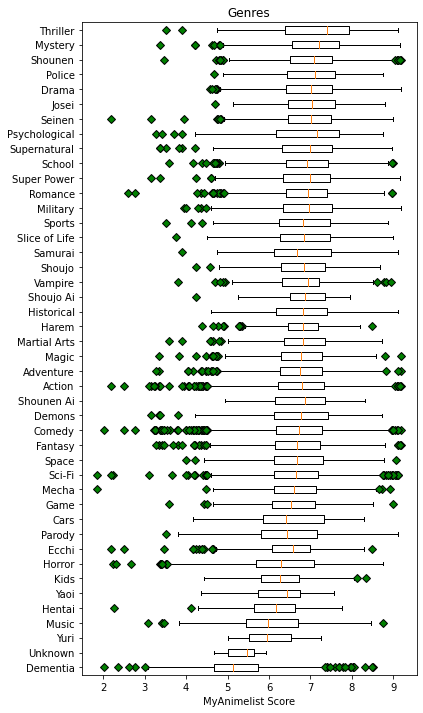

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



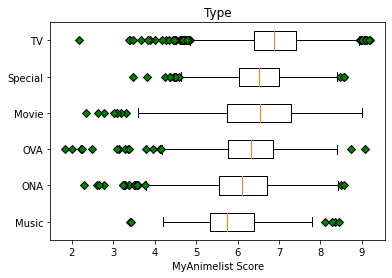

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



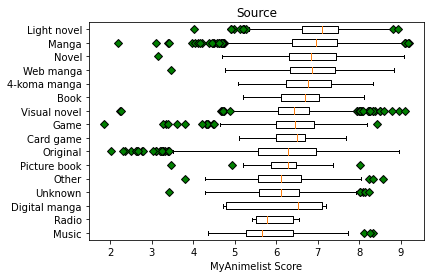

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



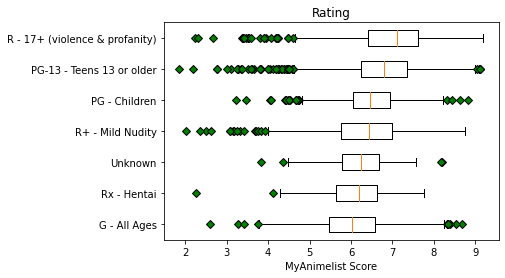

In [16]:
### Finding outliers
###################################### Plots
score_var  = 'Score'
for f in ['Genres', 'Type', 'Source', 'Rating'] :
  anime[f] = anime[f].str.split(', ')
  datas = defaultdict(list)
  for score, types in zip( anime[score_var], anime[f] ):
    if score == "Unknown": continue
    for type in types :
      datas[ type ] += [ float(score) ]

  sorted_datas = sorted(datas.items(), key=lambda f : sum(f[1])/len(f[1]) )

  fig, ax = plt.subplots()
  ax.set_title( f )
  if f == "Genres" :
    ax.set_title( "Genres" )
    fig.set_figheight( 3*fig.get_figheight() )
  ax.boxplot( [f[1] for f in sorted_datas], vert=False, flierprops=dict(markerfacecolor='g', marker='D') )
  ax.set_yticklabels( [f[0] for f in sorted_datas] )
  ax.set_xlabel('MyAnimelist Score')
  plt.show()


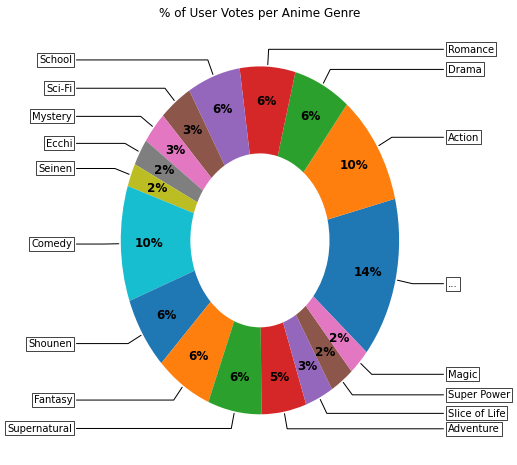

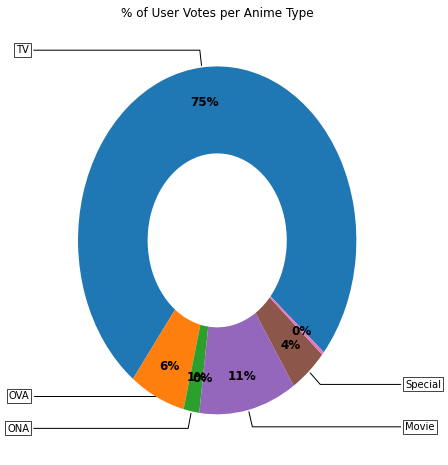

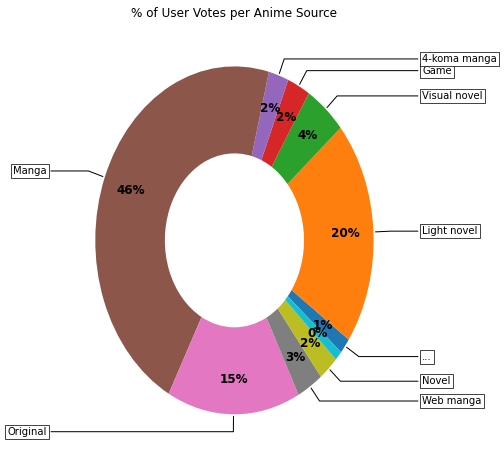

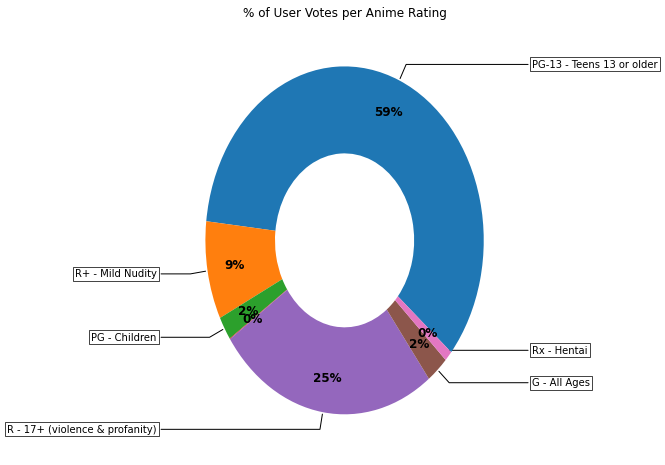

In [17]:
def get_voters(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10):
    x = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10]
    def f(val) :
      if val == "Unknown" : return 0
      return float(val)
    return int(sum(map(f, x)))
anime["N_votes"] = anime.apply(lambda x: get_voters(x['Score-1'], x['Score-2'], x['Score-3'], x['Score-4'], x['Score-5'], x['Score-6'], x['Score-7'], x['Score-8'], x['Score-9'], x['Score-10']), axis=1)

for f in ['Genres', 'Type', 'Source', 'Rating'] :
    datas = defaultdict(list)
    for score, types in zip( anime["N_votes"], anime[f] ):
      if score == "Unknown": continue
      for type in types :
        datas[ type ] += [ float(score) ]

    sorted_datas = sorted(datas.items(), key=lambda f : sum(f[1]) )
    data_x = [sum(f[1]) for f in sorted_datas]
    data_xx = [len(f[1]) for f in sorted_datas]
    data_y = [f[0] for f in sorted_datas]

    if f == 'Source':
      data_x = data_x[-9:] + [ sum(data_x[:-9]) ]
      data_y = data_y[-9:] + [ '...' ]
    if f == 'Genres':
      data_x = data_x[-16:] + [ sum(data_x[:-18]) ]
      data_y = data_y[-16:] + [ '...' ]
    if f == 'Year_class':
      data_x = data_x[-8:] + [ sum(data_x[:-8]) ]
      data_y = data_y[-8:] + [ '...' ]

    data_x = list(reversed(data_x))
    data_y = list(reversed(data_y))

    fig, ax = plt.subplots(figsize=(10,8))
    data_y = data_y[::2] + list(data_y[1::2])
    wedges, texts, autotexts = ax.pie(data_x[::2] + list(data_x[1::2]), wedgeprops=dict(width=0.5), startangle=-40, autopct='%d%%', pctdistance=0.80)

    bbox_props = dict(boxstyle="square,pad=0.2", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
      ang = (p.theta2 - p.theta1)/2. + p.theta1
      y = np.sin(np.deg2rad(ang))
      x = np.cos(np.deg2rad(ang))
      horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
      connectionstyle = "angle,angleA=0,angleB={}".format(ang)
      kw["arrowprops"].update({"connectionstyle": connectionstyle})
      if data_y[i] == "Unknown" : continue
      if data_y[i] == "Music" : continue
      extra = 0
      if data_y[i] == "Rx - Hentai" : extra = 0.1
      if data_y[i] == "OVA" : extra = 0.1
      ax.annotate(data_y[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.1*y+extra), horizontalalignment=horizontalalignment, **kw)

    plt.setp(autotexts, size=12, weight="bold", color="black")
    ax.set_aspect(aspect=1.25)

    plt.title("% of User Votes per Anime " + f)
    if f == "Genres" : plt.title( "% of User Votes per Anime Genre" )
#    if f == "Rating"  : plt.title( "% of User Votes per Anime Age rating" )
#   if f == 'Year_class' : plt.title( "% of User Votes per Anime Release year" )
#   if f == 'Month' :      plt.title( "% of User Votes per Anime Release month" )

In [18]:
## Years in which highest animes produced
df = anime['Year'].value_counts().sort_values(ascending=False).reset_index().head(10)

In [19]:
df = df.rename(columns={'index':'Year', 'Year':'Count of Animes'})

In [20]:
df.dtypes

Year               object
Count of Animes     int64
dtype: object

In [21]:
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

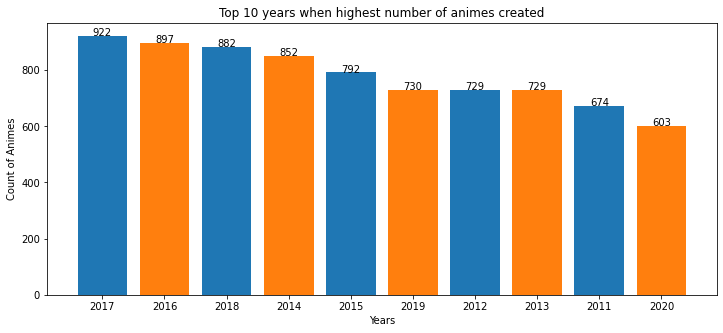

In [22]:
if __name__ == '__main__':

    # creating data on which bar chart will be plot
    x = df['Year'].astype(str)
    y= df['Count of Animes']

    #[922,897,882,852,792,730,729,729,674,603]
    # setting figure size by using figure() function
    plt.figure(figsize = (12, 5))

    # making the bar chart on the data
    plt.bar(x, y, color=['C0','C1'])

    # calling the function to add value labels
    addlabels(x, y)

    # giving title to the plot
    plt.title("Top 10 years when highest number of animes created")

    # giving X and Y labels
    plt.xlabel("Years")
    plt.ylabel("Count of Animes")

    # visualizing the plot
    plt.show()


In [23]:
df2 = anime['Type'].value_counts().reset_index()
df2 = df2.rename(columns={'index':'Anime Type', 'Type':'Count'})

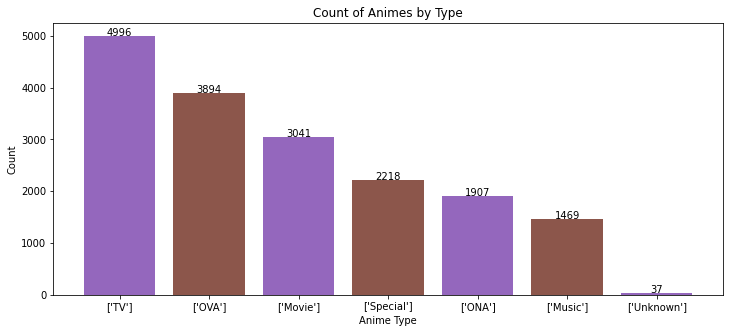

In [24]:
if __name__ == '__main__':

    # creating data on which bar chart will be plot
    x = df2['Anime Type'].astype(str)
    y= df2['Count']
    plt.figure(figsize = (12, 5))
    plt.bar(x, y, color=['C4','C5'])
    addlabels(x, y)
    plt.title("Count of Animes by Type")
    plt.xlabel("Anime Type")
    plt.ylabel("Count")
    plt.show()



In [25]:
df3 = anime['Rating'].value_counts().reset_index()
df3 = df3.rename(columns={'index':'Rating', 'Rating':'Count'})


Text(0, 0.5, 'Count')

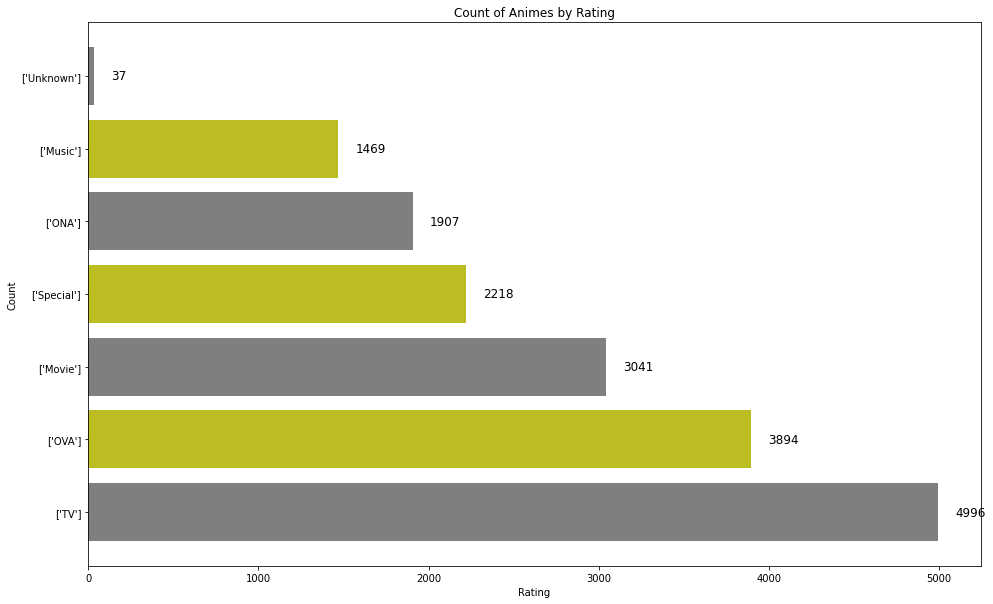

In [26]:
fig, ax = plt.subplots(figsize = (16, 10))
ax.barh(x, y, color=['C7','C8'])
for i, v in enumerate(y):
    ax.text(v + 100, i, str(v), color='black', fontsize=12, ha='left', va='center')
plt.title("Count of Animes by Rating")
plt.xlabel("Rating")
plt.ylabel("Count")

In [27]:
df4 = anime['Source'].value_counts().reset_index()
df4 = df4.rename(columns={'index':'Source', 'Source':'Count'})

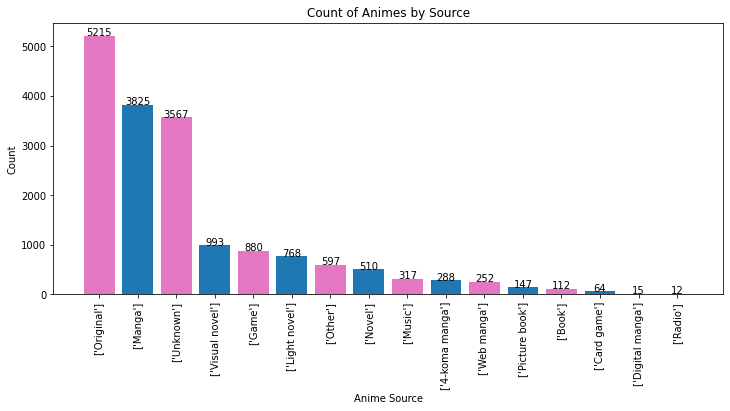

In [28]:
##creating data on which bar chart will be plot
x = df4['Source'].astype(str)
y= df4['Count']
plt.figure(figsize = (12, 5))
plt.bar(x, y, color=['C6','C10'])
addlabels(x, y)
plt.title("Count of Animes by Source")
plt.xlabel("Anime Source")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

In [114]:
df5 = anime.sort_values('Score', ascending=False)
df5["Score"].replace({"Unknown": "0"}, inplace=True)
df5 = df5.sort_values('Score', ascending=False).head(10).sort_values('Score')

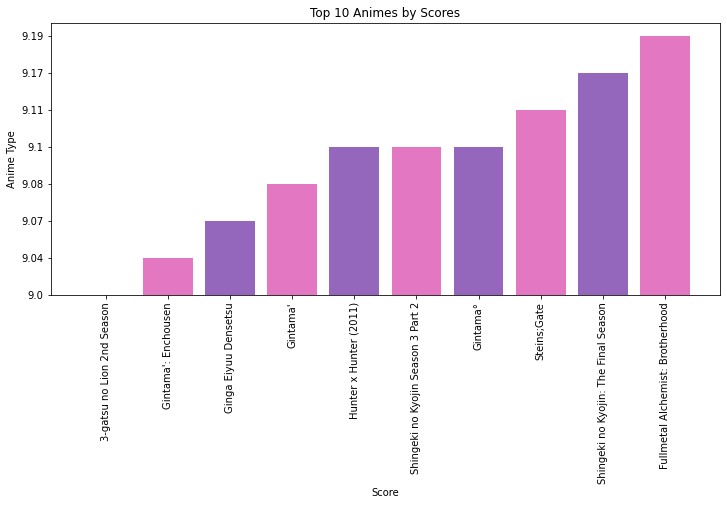

In [117]:
if __name__ == '__main__':

    # creating data on which bar chart will be plot
    y = df5['Score']
    x= df5['Name']
    plt.figure(figsize = (12, 5))
    plt.bar(x, y, color=['C4','C6'])
    #addlabels(x, y)
    plt.title("Top 10 Animes by Scores")
    plt.xlabel("Score")
    plt.ylabel("Anime Type")
    plt.xticks(x, x, rotation ='vertical')
    plt.show()

In [91]:
df5 = anime.sort_values('Ranked', ascending=False)
df5["Ranked"].replace({"Unknown": "0"}, inplace=True)
df5 = df5.sort_values('Ranked', ascending=False).head(10).sort_values('Ranked')
#df5

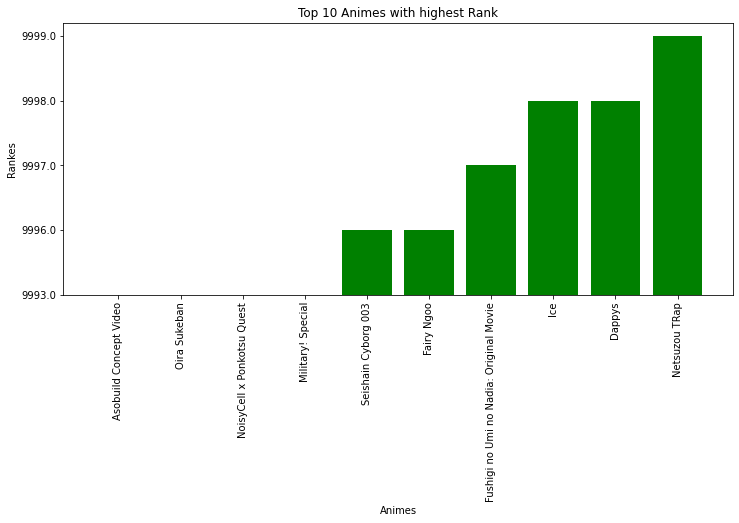

In [106]:

if __name__ == '__main__':

    # creating data on which bar chart will be plot
    y = df5['Ranked']
    x = df5['Name']

    plt.figure(figsize = (12, 5))

    # making the bar chart on the data
    plt.bar(x, y, color=['Green'])

    # calling the function to add value labels
    # function to add value labels
    #addlabels(x, y)

    # giving title to the plot
    plt.title("Top 10 Animes with highest Rank")

    # giving X and Y labels
    plt.ylabel("Rankes")
    plt.xlabel("Animes")
    plt.xticks(x, x, rotation ='vertical')
    # visualizing the plot
    plt.show()